In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from aging.plotting import format_plots, PlotConfig, save_factory, figure
from aging.behavior.pseudotime import compute_pseudotime, pseudotime_springplot

In [2]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "pseudotime", tight_layout=False)

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_v1.parquet')

In [4]:
def remove_crl(df):
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [5]:
df

relabeled_syllables                                                                      0   \
age subject_name session_name                uuid                                             
3   c07_m01_b01  ontogney_males_3w           0514b112-c12c-4785-84bd-93a8b40235e9  0.019225   
    c07_m02_b02  ontogeny_males_3w           4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.015543   
    c07_m03_b03  ontogeny_males_3w           183c7534-404c-4071-9b7f-7285d7459409  0.022178   
    c07_m04_b04  ontogeny_males_3w           2b5a857f-2e64-470c-801e-1149450c6f56  0.024126   
    m01b01c01    ontogeny_cohorts_3wks       56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.017040   
...                                                                                     ...   
91  c03_m04_b04  ontogeny_males_22months_CRL 17d97524-3af6-4b81-807d-a1b7126e4945  0.077769   
    c04_m01_b01  ontogeny_males_22months_CRL e85e0553-4474-46a1-9feb-9c0ee3465e1c  0.061574   
    c04_m02_b02  ontogeny_males_22months_CRL bfe65d6f-993d-466f-8e22-13d47cc63e1b  0.059507   
    c04_m03_b03  ontogeny_males_22months_CRL 1cd87b07-0cb6-4184-91a1-082fbe93dd1c  0.056075   
    c04_m04_b04  ontogeny_males_22months_CRL 19e981b4-a620-4986-a5db-ba6fc8252921  0.051132   

relabeled_syllables                                                                      1   \
age subject_name session_name                uuid                                             
3   c07_m01_b01  ontogney_males_3w           0514b112-c12c-4785-84bd-93a8b40235e9  0.015046   
    c07_m02_b02  ontogeny_males_3w           4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.006452   
    c07_m03_b03  ontogeny_males_3w           183c7534-404c-4071-9b7f-7285d7459409  0.003310   
    c07_m04_b04  ontogeny_males_3w           2b5a857f-2e64-470c-801e-1149450c6f56  0.029547   
    m01b01c01    ontogeny_cohorts_3wks       56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.003341   
...                                                                                     ...   
91  c03_m04_b04  ontogeny_males_22months_CRL 17d97524-3af6-4b81-807d-a1b7126e4945  0.067997   
    c04_m01_b01  ontogeny_males_22months_CRL e85e0553-4474-46a1-9feb-9c0ee3465e1c  0.035728   
    c04_m02_b02  ontogeny_males_22months_CRL bfe65d6f-993d-466f-8e22-13d47cc63e1b  0.040446   
    c04_m03_b03  ontogeny_males_22months_CRL 1cd87b07-0cb6-4184-91a1-082fbe93dd1c  0.045234   
    c04_m04_b04  ontogeny_males_22months_CRL 19e981b4-a620-4986-a5db-ba6fc8252921  0.026542   

relabeled_syllables                                                                      2   \
age subject_name session_name                uuid                                             
3   c07_m01_b01  ontogney_males_3w           0514b112-c12c-4785-84bd-93a8b40235e9  0.023126   
    c07_m02_b02  ontogeny_males_3w           4c88ce4e-4ba7-4c6b-84f6-b979c71e2439  0.020235   
    c07_m03_b03  ontogeny_males_3w           183c7534-404c-4071-9b7f-7285d7459409  0.023171   
    c07_m04_b04  ontogeny_males_3w           2b5a857f-2e64-470c-801e-1149450c6f56  0.034969   
    m01b01c01    ontogeny_cohorts_3wks       56ce96a5-cfa2-48ea-b4ff-7190b18bb5e7  0.013030   
...                                                                                     ...   
91  c03_m04_b04  ontogeny_males_22months_CRL 17d97524-3af6-4b81-807d-a1b7126e4945  0.066368   
    c04_m01_b01  ontogeny_males_22months_CRL e85e0553-4474-46a1-9feb-9c0ee3465e1c  0.063094   
    c04_m02_b02  ontogeny_males_22months_CRL bfe65d6f-993d-466f-8e22-13d47cc63e1b  0.061367   
    c04_m03_b03  ontogeny_males_22months_CRL 1cd87b07-0cb6-4184-91a1-082fbe93dd1c  0.059813   
    c04_m04_b04  ontogeny_males_22months_CRL 19e981b4-a620-4986-a5db-ba6fc8252921  0.070648   

relabeled_syllables                                                                      3   \
age subject_name session_name                uuid                                             
3   c07_m01_b01  ontogney_males_3w           0514b112-c12c-4785-84bd-93a8b40235e9  0.011424   
    c07

In [6]:
pseudo_df = compute_pseudotime(df, remove_crl, k_neigh=7)
pseudo_df.reset_index().loc[:, ['pseudotime_rank', 'age']].corr(method='spearman')

  0%|          | 0/5000 [00:00<?, ?it/s]

,pseudotime_rank,age
pseudotime_rank,1.00000,0.92475
age,0.92475,1.00000


In [7]:
colors = ['#DADAEB','#6A51A3']
sns.blend_palette(colors, 12)

[(0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.8152864282968089, 0.8064436755094194, 0.8961014994232986),
 (0.775670895809304, 0.7579853902345252, 0.8706343713956171),
 (0.7360553633217993, 0.7095271049596309, 0.8451672433679354),
 (0.6947174163783161, 0.658961937716263, 0.8185928489042675),
 (0.6551018838908113, 0.6105036524413687, 0.7931257208765858),
 (0.6154863514033064, 0.5620453671664745, 0.7676585928489043),
 (0.5758708189158016, 0.5135870818915802, 0.7421914648212226),
 (0.5345328719723184, 0.46302191464821224, 0.7156170703575547),
 (0.49491733948481353, 0.4145636293733179, 0.6901499423298731),
 (0.45530180699730877, 0.36610534409842366, 0.6646828143021914),
 (0.41568627450980394, 0.3176470588235294, 0.6392156862745098)]

In [8]:
graph, pos, c = pseudotime_springplot(
    df,
    remove_crl,
    k_neigh=7,
    seed=3,
    node_size=3,
    cmap=sns.blend_palette(colors, as_cmap=True),
)

In [14]:
scatter_pos = np.array(list(pos.values()))

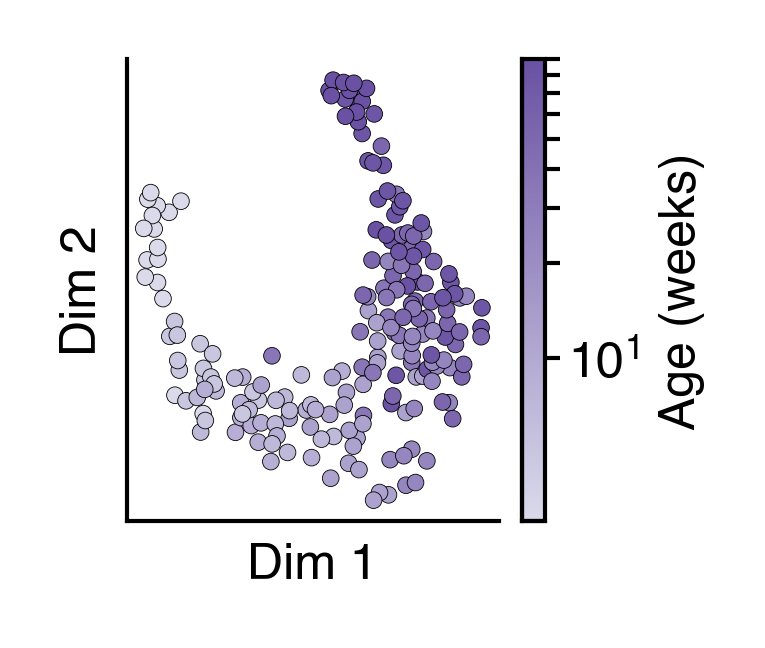

In [29]:
fig = figure(1, 1)
ax = fig.gca()
im = ax.scatter(
    *scatter_pos.T,
    c=c,
    cmap=sns.blend_palette(colors, as_cmap=True),
    s=4,
    lw=0.1,
    ec='k',
    # rasterized=True,
    norm='log'
)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
cb = fig.colorbar(im, ax=ax, label="Age (weeks)")
cb.set_ticks(np.arange(10, 100, 10, dtype='int'))
cb.set_ticks([], minor=True)
sns.despine()
saver(fig, "pseudotime-ontogeny");

In [8]:
merged_df = df.join(pseudo_df)

In [10]:
merged_df.to_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_pseudotime_v02.parquet')

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/pandas/io/parquet.py:159: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


In [11]:
from sklearn.cross_decomposition import PLSRegression

In [28]:
mdl = PLSRegression(n_components=5)
x = remove_crl(merged_df)
y = x['pseudotime_rank']
x = x.filter(regex=r'\d')
mdl.fit(x, y)
mdl.score(x, y)

0.9571945600380678

In [29]:
mdl = PLSRegression(n_components=5)
x = remove_crl(merged_df)
y = x.index.get_level_values('age')
x = x.filter(regex=r'\d')
mdl.fit(x, y)
mdl.score(x, y)

0.8752693907144654